In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Reading Frames using OpenCV

In [5]:
imPath = 'E:\\Dataset\\'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

### Change Detection using Frame Diffrencing

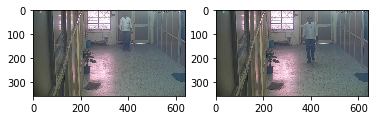

In [29]:
B = cv2.imread(r'E:\DataSet\frame_0105.jpg')
I = cv2.imread(r'E:\DataSet\frame_0126.jpg')

plt.subplot(121)
plt.imshow(B[:,:,::-1])
plt.subplot(122)
plt.imshow(I[:,:,::-1])

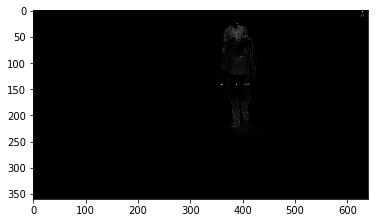

In [13]:
B = np.float32(B)
I = np.float32(I)

C = (I-B)**2
C2 = np.sum(C,axis=2)
plt.imshow(C2,cmap='gray')

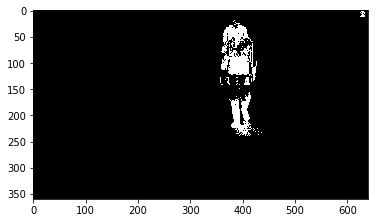

In [18]:
plt.imshow(C2>C2.mean()+C2.std(),cmap='gray')

### Change Detection Using Background Substraction(MOG - mixture of gaussian model)

In [4]:
imPath = 'E:\\Enhanced_Images\\enhanced\\'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] =fgmask,fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

### Removing Background noise using Morphology

In [3]:
imPath = 'E:\\Enhanced_Images\\enhanced\\'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] =fgmask,fgmask,fgmask
    
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

## Object detection and classification using CVLIB

In [10]:
import cvlib as cv
from cvlib.object_detection import draw_bbox 

imPath = 'E:\\Enhanced_Images\\enhanced\\'

for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    bbox,labels,conf = cv.detect_common_objects(frame, confidence=0.5, nms_thresh=0.3, model='yolov3', enable_gpu=False)
    frame = draw_bbox(frame, bbox, labels,conf)
    
#     cv2.imshow('Display',frame)
    cv2.imwrite('E:\\Enhanced_Images\\classified\\'+imName,frame)
#     k = cv2.waitKey(0) & 0xff
#     if k == 27:
#         break
# cv2.destroyAllWindows()

In [2]:
imPath = 'E:\\Enhanced_Images\\classified\\'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()